<a href="https://colab.research.google.com/github/phmouras/Projeto_Pos/blob/main/pseudospectral%20kinks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import exp

# Método pseudoespectral para ondas kinks


# ttpsi - colpsi + dV/dpsi = 0;  unidimensional


N = 300

L0 = 10

col = np.cos(np.arange(N)*math.pi / (N-1))     # pontos de colocação
x = L0 * np.arctanh(col)                   # mapeamento   

xcol = (1 - np.tanh(x/L0)**2)/L0              # dcol/dx
xxcol = (2*np.tanh(x/L0)*(1+np.tanh(x/L0)**2))/L0**2   # d^2 col / dx^2

# Matriz base:

T = np.zeros([N+2,N])
xT = np.zeros([N+2,N])
xxT = np.zeros([N+2,N])
colT = np.zeros([N+2,N])
ccolT = np.zeros([N+2,N])


T[0,] = 1
T[1,] = col

for i in range(2,N+2):
  T[i,] = 2*col*T[i-1,] - T[i-2,]

# Derivada Matriz Base:

colT[0,] = 0
colT[1,] = 1
xT[0,] = xcol*colT[0,]
xT[1,] = xcol*colT[1,]

for i in range(2, N+2):
  colT[i,] = 2*col*colT[i-1,] + 2*T[i-1,] - colT[i-2,]

xT[i,] = xcol*colT[i,]                                                    # colT[i,] = dT[i,]/dcol, xcol = dcol/dx


ccolT[0,] = 0
ccolT[1,] = 0
xxT[0,] = xxcol*colT[0,] + (xcol)**2 * ccolT[0,]
xxT[1,] = xxcol*colT[0,] + (xcol)**2 * ccolT[0,]

for i in range(2, N+2):
  ccolT[i,] = 2*colT[i-1,] + 2*col*ccolT[i-1,] + 2*colT[i-1] - ccolT[i-2,]

xxT[i,] = xxcol*colT[i,] + (xcol)**2 * ccolT[i,]                         # ccolT[i,] = d²T[i,]/dcol²



psi = T[0:N,:]   
xpsi = xT[0:N,:]
xxpsi = xxT[0:N,:]


# Condicoes iniciais

x0 = 5
u = 0.2


f_colisao0 = -1+np.tanh((x+x0)/np.sqrt(-u**2+1))-np.tanh((x-x0)/np.sqrt(-u**2+1))                 # dado inicial da colisão de um kink com um antikink



inv_psi = np.linalg.inv(psi)
  

a0 = np.dot(f_colisao0, inv_psi)  # coeficientes a(0)

phi = np.dot(a0, psi)      # solução exata em t=0



# Derivada temporal de psi para t = 0


dtf_colisao0 = -(1-np.tanh((x+x0)/np.sqrt(-u**2+1))**2)*u/np.sqrt(-u**2+1)-(1-np.tanh((x-x0)/np.sqrt(-u**2+1))**2)*u/np.sqrt(-u**2+1) 

da = np.dot(dtf_colisao0, inv_psi)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in arctanh


In [21]:
# Plot: Condições Iniciais

M = 3000

xplot = np.linspace(-30,30,M)

colplot = np.tanh(xplot/L0)

Tplot = np.zeros([N+2,M])

Tplot[0,] = 1
Tplot[1,] = colplot


for i in range(2,N+2):
  Tplot[i,] = 2*colplot*Tplot[i-1,] - Tplot[i-2,]


psiplot = Tplot[0:N,:] 



xplot0 = 5
u = 0.2

f_coliplot0 = -1+np.tanh((xplot+x0)/np.sqrt(-u**2+1))-np.tanh((xplot-x0)/np.sqrt(-u**2+1)) 

dtf_coliplot0 = -(1-np.tanh((xplot+x0)/np.sqrt(-u**2+1))**2)*u/np.sqrt(-u**2+1)-(1-np.tanh((xplot-x0)/np.sqrt(-u**2+1))**2)*u/np.sqrt(-u**2+1) 

phiplot = np.dot(a0, psiplot)

erro = abs(phiplot - f_coliplot0)

dtphiplot = np.dot(da, psiplot)
#da01 = np.dot(dtf_k0, inv_psi)

#dtfplot = (1-np.tanh((xplot-x0)/np.sqrt(-u**2+1))**2)*u/np.sqrt(-u**2+1)

#dtphiplot = np.dot(da01, psiplot)

np.shape(f_coliplot0)



(3000,)

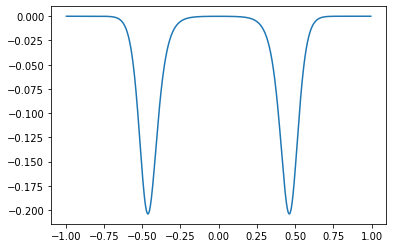

In [22]:
plt.plot(colplot, dtphiplot)

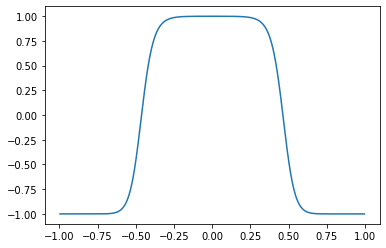

In [23]:
plt.plot(colplot, f_coliplot0)

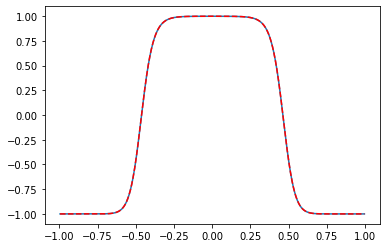

In [24]:
plt.plot(colplot, phiplot, colplot, f_coliplot0, "--r")
plt.show()

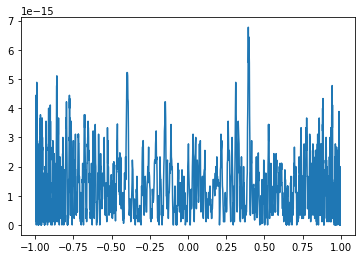

In [25]:
plt.plot(colplot, erro)

In [26]:

h = 0.01
tf = 100

It = int(tf/h)

t = np.linspace(0, tf, It + 1)

phi_set = np.zeros([It,M])

phi0_set = np.zeros([0,It])


def dV(phi):
  return phi**3 - phi


for i in range(It):  # Runge Kutta 4th order

  phi = np.dot(a0, psi)
  dda = np.dot(np.dot(a0, xxpsi) - dV(phi), inv_psi) 
  L1 = h*(da)
  K1 = h*(dda)

  phi = np.dot(a0 + L1/2, psi)
  dda = np.dot(np.dot(a0 + L1/2, xxpsi) - dV(phi), inv_psi) 
  L2 = h*(da + K1/2)
  K2 = h*(dda)

  phi = np.dot(a0 + L2/2, psi)
  dda = np.dot(np.dot(a0 + L2/2, xxpsi) - dV(phi), inv_psi)  
  L3 = h*(da + K2/2)
  K3 = h*(dda)

  phi = np.dot(a0 + L3, psi)
  dda = np.dot(np.dot(a0 + L3, xxpsi) - dV(phi), inv_psi) 
  L4 = h*(da + K3)
  K4 = h*(dda) 
  
  da = da + 1/6 * (K1 + 2*K2 + 2*K3 + K4)
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  phi_set[i,:] = np.dot(a0, psiplot)
 



In [17]:
a0

array([-3.83870280e-01,  8.27723353e-15, -1.04912738e+00, -1.89575171e-14,
        5.95484117e-01,  1.59231360e-14, -1.00633796e-01,  4.05086603e-17,
       -2.10734677e-01, -1.69583507e-14,  2.48785778e-01,  1.95614543e-14,
       -9.43083714e-02, -8.85168073e-15, -8.09662535e-02, -1.02989896e-14,
        1.43984866e-01,  2.20378873e-14, -7.99987883e-02, -1.62429665e-14,
       -2.83861528e-02, -2.28300595e-15,  8.74670634e-02,  1.97025314e-14,
       -6.48463279e-02, -2.22381725e-14, -2.60011617e-03,  6.48064654e-15,
        5.38498535e-02,  1.34093037e-14, -5.41748564e-02, -2.57108557e-14,
        1.34757713e-02,  1.45820935e-14,  3.09489271e-02,  5.85448936e-15,
       -4.60169051e-02, -2.49139107e-14,  2.49902626e-02,  2.21968992e-14,
        1.19142153e-02, -9.56046079e-16, -3.54850266e-02, -1.96699640e-14,
        2.99683423e-02,  2.57603968e-14, -3.49256001e-03, -1.05185586e-14,
       -2.09659576e-02, -1.38475150e-14,  2.57061716e-02,  2.66095800e-14,
       -1.16899088e-02, -

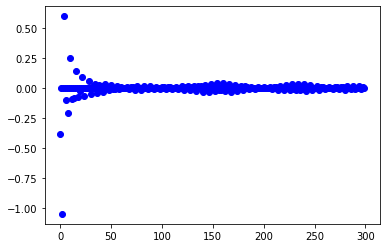

In [14]:

plt.plot(a0, "bo")

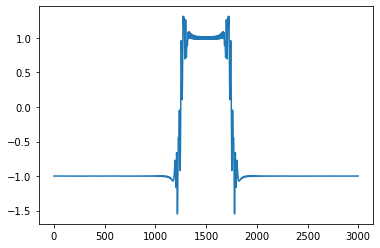

In [16]:
plt.plot(phi_set[i,:])
